<a href="https://colab.research.google.com/github/rmaffulli/LIF_tutorial_student/blob/main/LeakyIntegrateAndFireTutorial_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Set-up
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [ ]:
#@title Figure settings
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/rmaffulli/LIF_tutorial/main/figures.mplstyle")

# Leaky Integrate and Fire (LIF) neurons
During this tutorial you will learn how several classes of LIF work.

We will start by building, step by step, a simple model of a leaky integrate-and-fire neuron. The model of the neuron is made of two key ingredients:
1. A leak conductance (hence the *leaky*): this part of the model ensures that the membrane potential of the neuron will tend to the equilibrium potential once the input stimulation ceases
2. A firing mechanism: point neuron models (i.e. models where the biochemical details of the firing mechanism are omitted) cannot generate spikes. We have to define a, biophysically plausible, firing mechanism and implement it.

After this first section we will discuss the limitations of the LIF model and have a look at how to modify it to allow for more rich dynamics.

All the models are partially incomplete. You will have to complete all the functions, according to the definition of the model. We will do part of the coding during the lecture. You should complete the remaining part at home. Completion of all the coding exercises is mandatory to pass the exam. You can submit the final results to me via email by sharing your version of the google colab.

# References
Below is a *non exaustive* list of textbooks that are a great starting point to explore the vastity of computational neuroscience!
- Miller, Paul. An introductory course in computational neuroscience. MIT Press, 2018.
- Gerstner, Wulfram, et al. Neuronal dynamics: From single neurons to networks and models of cognition. Cambridge University Press, 2014.
- Churchland, Patricia Smith, and Terrence Joseph Sejnowski. The computational brain. MIT press, 1994.

# The *Leaky Integrate* part
A leaky integrator neuron takes the integral of an input, but gradually leaks a small amount of input over time. The state of the integrator, over time, is ruled by the following differential equation:
$$ C_m\frac{dV_m(t)}{dt} = G_L(E_L-V_m(t)) + I_{in} $$
Where: $C_m$ is the membrane capacitance, $V_m$ is the membrane potential, $G_L$ is the leak conductance, $E_L$ is the leak potential and $I_{in}$ is the input current to the neuron.
In this section you will have to implement a neuron that behaves according to the aboce differential equation. Before jumping to the implementation take a look at the differential equation and try to address the following questions:
- What happens once $E_L = V_m$?
- What do you expect to happen if $I_{in} = 0$?
- Can you give a hypothesis of what to expect from the membrane potential $V_m$ of a leaky integrator if $I_{in} > 0$ for a sustained period of time? Do you think this is a realistic description of a neuron? You will have the chance to test this hypothesis once implemented the leaky integrator

In [ ]:
def leaky_int(t,i_in,model_constants):
  ### Inputs:
  ### t -> time (numpy array of doubles marking the time points where the simulation will be run)
  ### i_in -> input current (numpy array having the same dimension of t)
  ### model_constants -> structure containing all the constants for the model
  ### Output:
  ### v_m -> values of membrane potential over time (numpy array having the same dimension of t)
  c_m = model_constants.c_m
  g_l = model_constants.g_l
  e_l = model_constants.e_l
  
  #############################################################################
  # Students: Fill in missing code (...) and comment or remove the next line
  raise NotImplementedError("Function not yet implemented")
  #############################################################################

  return v_m


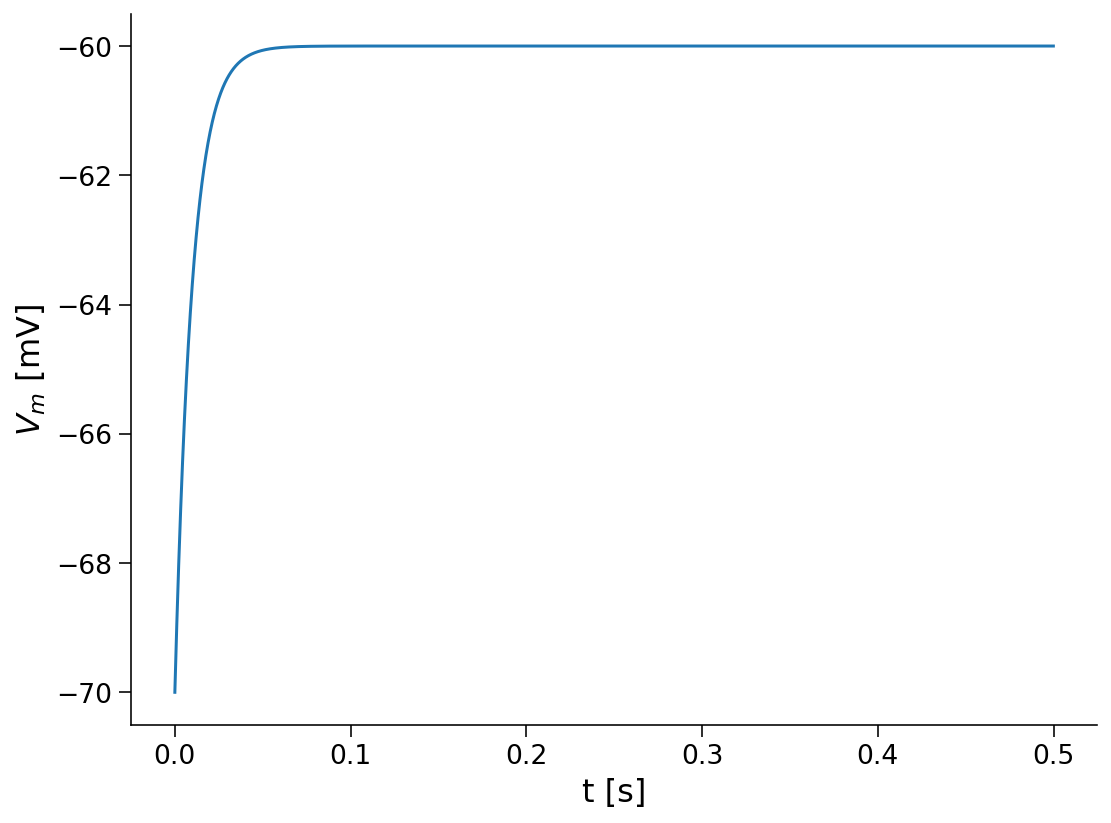

In [ ]:
#@title Run leaky integrator with constant input current
dt = 0.0001 #@param {type:"number", default:0.1}
t_end = 0.5 #@param {type:"number"}
c_m = 100E-12 #@param {type:"number"}
g_l = 10E-9 #@param {type:"number"}
e_l = -70E-3 #@param {type:"number"}
i_in = 100E-12 #@param {type:"number"}

t = np.arange(0,t_end,dt)

@dataclass
class Constants:
    c_m: float
    g_l: float
    e_l: float

model_constants = Constants(c_m,g_l,e_l)
v_m = leaky_int(t,i_in,model_constants)

_ = plt.plot(t,v_m*1000)
_ = plt.xlabel("t [s]")
_ = plt.ylabel("$V_m$ [mV]")

# Introduce spike generation: the Leaky Integrate and Fire
So far we have an integrator that does not produce anything close to an action potential.

- Can we simulate spikes using a LIF? Are we modelling all the mechanisms that are responsible of spike generation?
- How can we overcome this?

A simple way is to simply impose the membrane potential to drop to a specified value $V_{reset}$ once the membrane potential reaches a threshold $V_{th}$.

In [ ]:
def leaky_int_and_fire(t,i_in,model_constants):
  ### Inputs:
  ### t -> time (numpy array of doubles marking the time points where the simulation will be run)
  ### i_in -> input current (numpy array having the same dimension of t)
  ### model_constants -> structure containing all the constants for the model
  ### Output:
  ### v_m -> values of membrane potential over time (numpy array having the same dimension of t)
  ### sp -> spike train
  c_m = model_constants.c_m
  g_l = model_constants.g_l
  e_l = model_constants.e_l
  v_th = model_constants.v_th
  v_reset = model_constants.v_reset
  
  #############################################################################
  # Students: Fill in missing code (...) and comment or remove the next line
  raise NotImplementedError("Function not yet implemented")
  #############################################################################

  return v_m, sp


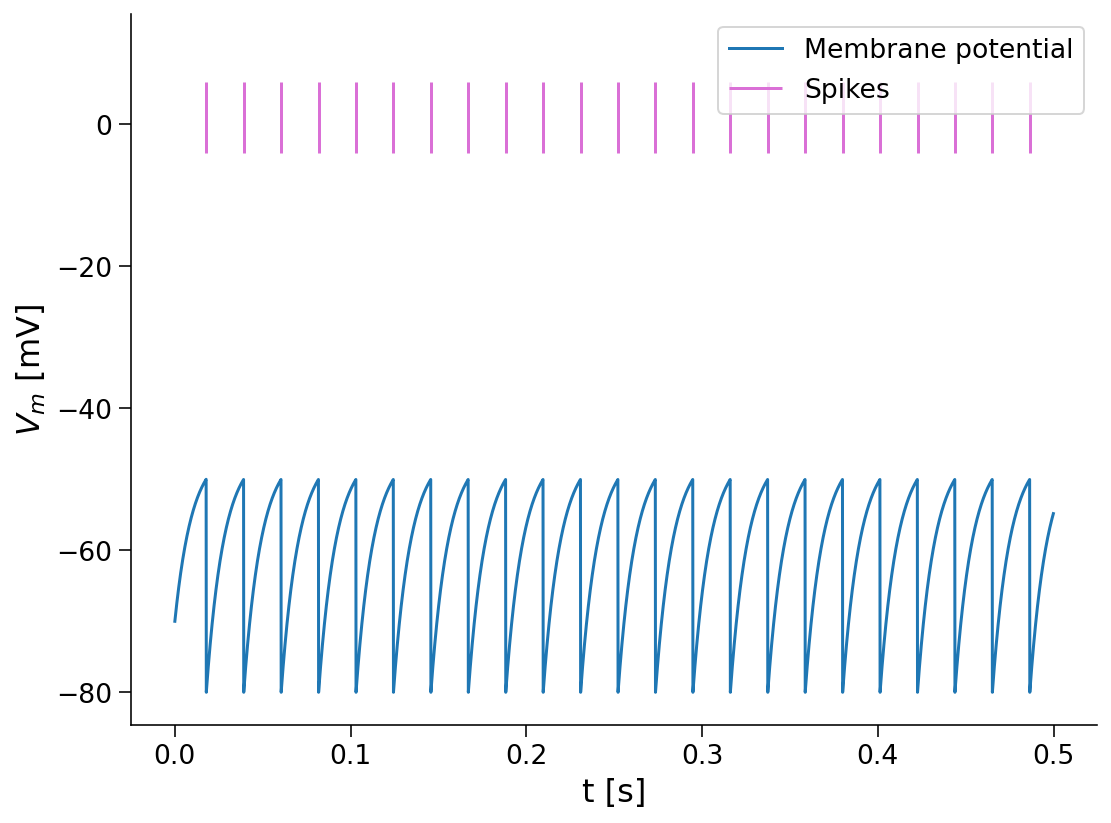

In [ ]:
#@title Run LIF with constant input current
dt = 0.0001 #@param {type:"number", default:0.1}
t_end = 0.5 #@param {type:"number"}
c_m = 100E-12 #@param {type:"number"}
g_l = 10E-9 #@param {type:"number"}
e_l = -70E-3 #@param {type:"number"}
i_in = 240E-12 #@param {type:"number"}
v_th = -50E-3 #@param {type:"number"}
v_reset = -80E-3 #@param {type:"number"}

t = np.arange(0,t_end,dt)

@dataclass
class Constants:
    c_m: float
    g_l: float
    e_l: float
    v_th: float
    v_reset: float

model_constants = Constants(c_m,g_l,e_l,v_th, v_reset)
v_m, sp = leaky_int_and_fire(t,i_in,model_constants)

_ = plt.plot(t,v_m*1000,label="Membrane potential")
_ = plt.xlabel("t [s]")
_ = plt.ylabel("$V_m$ [mV]")
_ = plt.eventplot(t[sp == 1], color='orchid',linelengths=10, label="Spikes")
_ = plt.legend(loc='best')

# Limitations of the LIF
We have a spiking neuron but can we do better than that? There are many aspects relative to neuronal dynamics that are neglected with using a simple LIF as we have done so far.
One issue is that the input current is integrated linearly, in a way that is not dependent from the state of the neuron. Another issue is that the membrane potential is reset every time there is a spike, losing all memory of the previous spikes.

For the reasons above, a simple LIF cannot produce *adaption*, *bursting* and *inhibitory rebound* (see lecture notes), as all those depend on the spiking history of the neuron, which is erased at every spike for a LIF. A LIF cannot account also for the observation that the shape of postsynaptic potentials depends on the time elapsed since the last spike, nor can give us information about the spatial structure of inputs and their effects on the membrane potential (e.g. synapses that are located far away from the soma are expected to evoke a smaller postsynaptic response at the soma).

But, if that's so bad, why bothering using a LIF? Despite its simplifications, it is very accurate in simulating spike generation in the soma, at least if we incorporate a way to account for adaptation and refractoriness.

# The refractory period
As we have seen during the lecture, there are multiple biophysical events that happen inside the neuron before and after an action potential (charges accumulating on the membrane wall, opening/closing of membrane channels, entrance of ions in the cell, membrane pumps extracting the excess charges from the cell...). All those events have their own dynamics and cannot happen instantly and for a sustained amount of time. As a result a neuron cannot realistically fire with a very high frequency forever!

The *refractory period* is a period of time, after an action potential, where a neuron cannot spike anymore. This is due to the fact that, during this time, the ion channels causing depolarization of the membrane cannot open anymore while they return to their baseline state. 

There are two ways to insert a refractory period in a LIF:
1. **Forced voltage clamp:** with this method we fix the membrane potential to its reset value for a set amount of time after an action potential. It's simple to implement and representative of real neurons at low firing rates. When firing rates are high, instead, the neuron will spend a greater proportion of its time with the membrane potential at its minimum. This means that the mean membrane potential will decrease when increasing the excitation current, which does not match experimental observations.
2. **Refractory conductance:** alternatively the refractory period can be simulated by addition of a large conductance that produces an hyperpolarizing potassium current. This will cause the membrane potential to decrease, making it harder for the neuron to generate an action potential, under the same excitation current. The refractory conductance increases at the time of each spike and decays between spike times with a short time constant $\tau_{ref}$.
In this way the equations for the LIF neuron will become two, to be solved simultaneously:
$$ C_m\frac{dV_m(t)}{dt} = G_L(E_L-V_m(t)) + I_{in} + G_{ref}(t)[E_k-V_m(t)]$$

$$ \frac{dG_{ref}(t)}{dt} = \frac{-G_{ref}(t)}{\tau_{ref}};\; G_{ref} → G_{ref} + \Delta G_{ref} \;(after \:a \:spike)$$

When the $G_{ref}$ term is much greater than the leak conductance, this term clamps the membrane potential at the Nernst potential for poassium ions $E_k$. With this approach we can omit the reset of the membrane potential after a spike as the increase in $G_{ref}$ causes the desired decrease of the membrane potential. Unlike the previous method, this has the advantage that the time spent at the reset value depends on the strength of the input current. The larger the currents, the more quickly they can overcome the hyperpolarizing current, which is also observed in real neurons.

3. **Voltage threshold increase:** The voltage threshold for producing a spike can be raised immediately following a spike and allowed to decay back with a short time constant.
$$ \frac{dV_{th}}{dt} = \frac{V_{th}^{(0)} - V_{th}(t)}{\tau_{ref}};\; V_{th} → V_{th} + \Delta V_{th} \;(after \:a \:spike)$$

As with the addition of a refractory conductance, this method has the advantage that the refractory period is not absolute, but depends on the input current. This method can be combined  with the hard reset of the membrane potential after a spike, or with the addition of a hyperpolarizing potassium conductance, as for method 2 above to simulate action potentials.

In the next section you will implement refractory period using a refractory conductance.

In [ ]:
def leaky_int_and_fire_ref_cond(t,i_in,model_constants):
  ### Inputs:
  ### t -> time (numpy array of doubles marking the time points where the simulation will be run)
  ### i_in -> input current (numpy array having the same dimension of t)
  ### model_constants -> structure containing all the constants for the model
  ### Output:
  ### v_m -> values of membrane potential over time (numpy array having the same dimension of t)
  ### sp -> spike train
  ### g_Ref -> refractory conductance
  c_m = model_constants.c_m
  g_l = model_constants.g_l
  e_l = model_constants.e_l
  e_k = model_constants.e_k
  v_th = model_constants.v_th
  tau_ref = model_constants.tau_ref
  delta_g = model_constants.delta_g
  
  #############################################################################
  # Students: Fill in missing code (...) and comment or remove the next line
  raise NotImplementedError("Function not yet implemented")
  #############################################################################

  return v_m, sp, g_ref

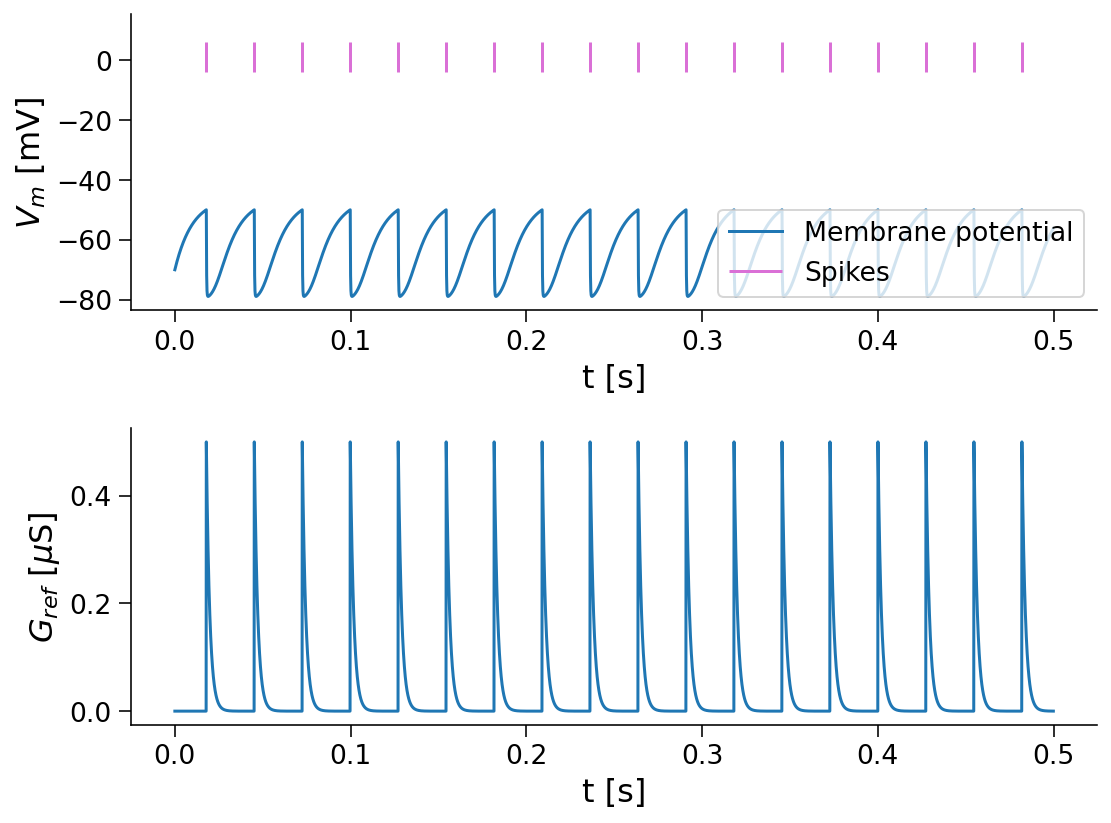

In [ ]:
#@title Run LIF with refractory period
dt = 0.0001 #@param {type:"number"}
t_end = 0.5 #@param {type:"number"}
c_m = 100E-12 #@param {type:"number"}
g_l = 10E-9 #@param {type:"number"}
e_l = -70E-3 #@param {type:"number"}
e_k = -80E-3 #@param {type:"number"}
i_in = 240E-12 #@param {type:"number"}
v_th = -50E-3 #@param {type:"number"}
tau_ref = 2E-3 #@param {type:"number"}
delta_g = 500E-9 #@param {type:"number"}


t = np.arange(0,t_end,dt)

@dataclass
class Constants:
    c_m: float
    g_l: float
    e_l: float
    e_k: float
    v_th: float
    tau_ref: float
    delta_g: float

model_constants = Constants(c_m,g_l,e_l,e_k,v_th,tau_ref,delta_g)
v_m, sp, g_ref = leaky_int_and_fire_ref_cond(t,i_in,model_constants)

fig,axs = plt.subplots(2,1)
axs[0].plot(t,v_m*1000,label="Membrane potential")
axs[0].eventplot(t[sp == 1], color='orchid',linelengths=10, label="Spikes")
axs[0].legend(loc='lower right')
axs[1].plot(t,g_ref*1E6,label="Refractory conductance")
_ = axs[0].set_xlabel("t [s]")
axs[0].set_ylabel("$V_m$ [mV]")
axs[1].set_ylabel("$G_{ref}$ [$\mu$S]")
_ =axs[1].set_xlabel("t [s]")

# Spike-rate-adaptation (SRA)
Many neurons respond to a pulse of current with spikes that are progressively rarer over time.
- Can you think of a reason why the brain does so? Can spike-rate adaptation have a 'meaning' in the brain?

SRA can be modelled, as for the refractory period, with a refractory conductance. There are, though some differences between a refractory period and spike rate adapation. As you have seen in our previous tutorial exercise, our LIF neuron was showing a refractory period *wihthout* SRA! What did we miss?

For the case of refractory conductance, each spike was causing a surge in $G_{ref}$, followed by an exponential decay. This was causing the membrane potential to drop and stay at small values for a specific amount of time, defined by $\tau_{ref}$. The refractory conductance was allowing us to keep trace of when a spike happened and causing the membrane potential to drop after a spike. Since the method was designed to cause a spike, its time scale had to be, by definition, the one of a spike! Try to see what happens if you modify $\tau_{ref}$ in the previous exercise.

What would happen if we replaced the firing mechanism used for the refractory period with a hard threshold for generating spikes (like in the first implementation of the LIF), and keep the refractory conductance to simulate SRA?
- How would you implement SRA?
- How would you change the properties of the refractory conductance ($G_{ref}$ and $\tau_{ref}$) for this scope? Why?

In the next section you will implement, from scratch, a SRA mechanism based on a refractory conductance plus a hard reset for the membrane potential as a firin mechanism.

In [ ]:
def leaky_int_and_fire_sra(t,i_in,model_constants):
  ### Inputs:
  ### t -> time (numpy array of doubles marking the time points where the simulation will be run)
  ### i_in -> input current (numpy array having the same dimension of t)
  ### model_constants -> structure containing all the constants for the model
  ### Output:
  ### v_m -> values of membrane potential over time (numpy array having the same dimension of t)
  ### sp -> spike train
  ### g_ref -> refractory conductance
  c_m = model_constants.c_m
  g_l = model_constants.g_l
  e_l = model_constants.e_l
  e_k = model_constants.e_k
  v_th = model_constants.v_th
  v_reset = model_constants.v_reset
  tau_sra = model_constants.tau_sra
  delta_g = model_constants.delta_g
  
  #############################################################################
  # Students: Fill in missing code (...) and comment or remove the next line
  raise NotImplementedError("Function not yet implemented")
  #############################################################################

  return v_m, sp, g_ref

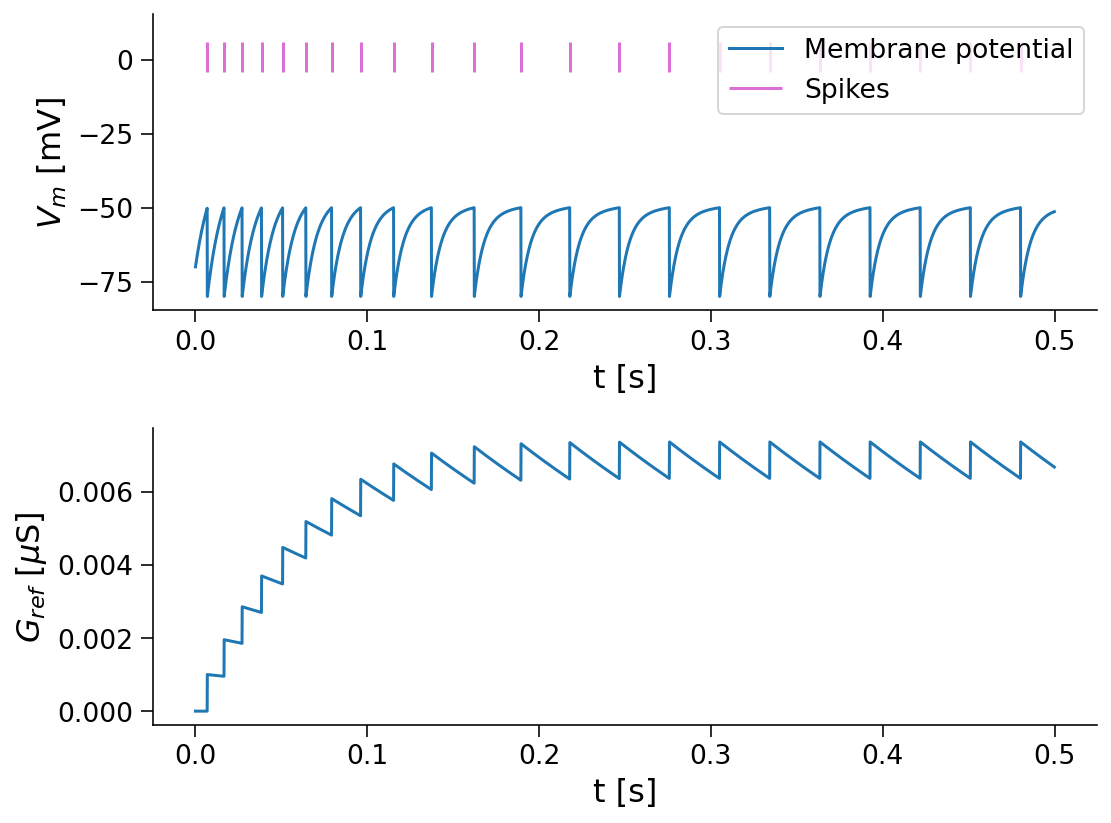

In [ ]:
#@title Run LIF with Spike Rate Adaptation
dt = 0.0001 #@param {type:"number"}
t_end = 0.5 #@param {type:"number"}
c_m = 100E-12 #@param {type:"number"}
g_l = 10E-9 #@param {type:"number"}
e_l = -70E-3 #@param {type:"number"}
e_k = -80E-3 #@param {type:"number"}
i_in = 400E-12 #@param {type:"number"}
v_th = -50E-3 #@param {type:"number"}
v_reset = -80E-3 #@param{type:"number"}
tau_sra =  0.2#@param {type:"number"}
delta_g = 1E-9 #@param {type:"number"}

t = np.arange(0,t_end,dt)

@dataclass
class Constants:
    c_m: float
    g_l: float
    e_l: float
    e_k: float
    v_th: float
    v_reset: float
    tau_sra: float
    delta_g: float

model_constants = Constants(c_m,g_l,e_l,e_k,v_th,v_reset,tau_sra,delta_g)
v_m, sp, g_ref = leaky_int_and_fire_sra(t,i_in,model_constants)

fig,axs = plt.subplots(2,1)
axs[0].plot(t,v_m*1000,label="Membrane potential")
axs[0].eventplot(t[sp == 1], color='orchid',linelengths=10, label="Spikes")
axs[0].legend(loc='lower right')
axs[1].plot(t,g_ref*1E6,label="Refractory conductance")
_ = axs[0].set_xlabel("t [s]")
axs[0].set_ylabel("$V_m$ [mV]")
axs[1].set_ylabel("$G_{ref}$ [$\mu$S]")
_ =axs[1].set_xlabel("t [s]")

# The Exponential Leaky Integrate and Fire with Adaptation (EALIF)
The most striking limitation of a LIF neuron is the absence of a spiking mechanism.
In all model neurons developed so far there is no actual action potential generated. On top of that, the slope of $V_m$ decreses as we get close to the threshold, which does not match what is observed in reality.

Another simplification of the LIF is the definition of a fixed threshold for firing. In reality the firing threshold is not fixed, and depends on the state of the neuron (hence on prior inputs).

The EALIF ([Brette, R., & Gerstner, W. (2005)](https://doi.org/10.1152/jn.00686.2005)) tries to solve those inconsistencies by introducing a non-linear spike-generating term in the differential equation for the membrane potential. On top of that, the model includes a second differential equation for a depolarizing current $I_{sra}$ that allows to account for spike-rate adaptation.

$$ C_m\frac{dV_m(t)}{dt} = G_L\biggr[E_L-V_m(t) + \Delta_{th} e^{\frac{V_m(t) - V_{th}}{\Delta_{th}}}\biggr] + I_{app} - I_{sra}$$
$$ \tau_{sra}\frac{dI_{sra}}{dt} = a(V_m - E_L) - I_{sra}$$

the equations above are combined with the two reset rules if $V_m > V_{max}$:
$$ V_m \mapsto V_{reset}$$
$$I_{sra} \mapsto I_{sra} + b$$

This model neuron is quite versatile as it generates a wide range of dynamics in its response. After implementing correctly the code you should be able to test it with the code cell below the next one. The code has already implemented some specific values of the model constants that generate very different neuronal responses.

In [ ]:
def ealif(t,i_in,model_constants):
  ### Inputs:
  ### t -> time (numpy array of doubles marking the time points where the simulation will be run)
  ### i_in -> input current (numpy array having the same dimension of t)
  ### model_constants -> structure containing all the constants for the model
  ### Output:
  ### v_m -> values of membrane potential over time (numpy array having the same dimension of t)
  ### sp -> spike train

  c_m = model_constants.c_m
  g_l = model_constants.g_l
  e_l = model_constants.e_l
  delta_th = model_constants.delta_th
  v_th = model_constants.v_th
  v_reset = model_constants.v_reset
  v_max = model_constants.v_max
  tau_sra = model_constants.tau_sra
  a = model_constants.a
  b = model_constants.b
  
  #############################################################################
  # Students: Fill in missing code (...) and comment or remove the next line
  raise NotImplementedError("Function not yet implemented")
  #############################################################################

  return v_m, sp, i_sra

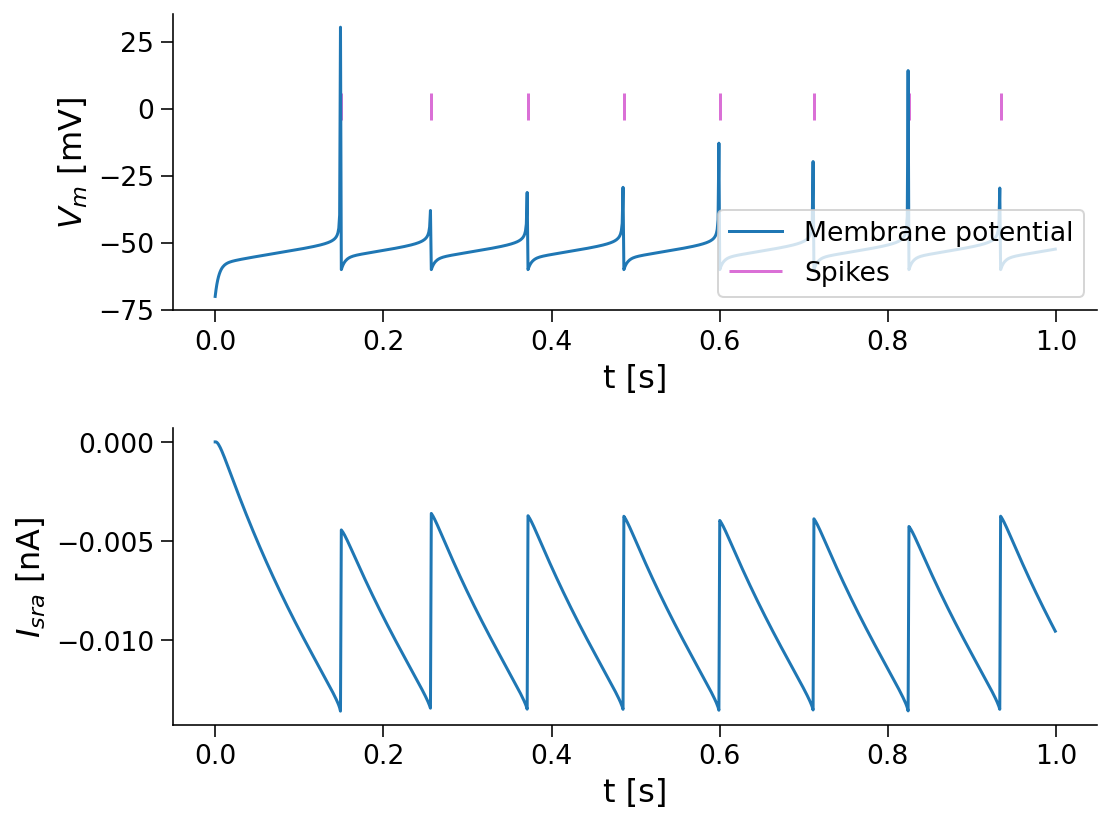

In [ ]:
#@title Run EALIF
@dataclass
class Constants:
    c_m: float
    g_l: float
    e_l: float
    delta_th: float
    v_th: float
    v_reset: float
    v_max: float
    tau_sra: float
    a: float
    b: float

model_constants = "delayed" #@param ["adapting", "tonic", "bursting","delayed"]
if model_constants == "adapting":
  c_m = 100E-12 
  g_l = 10E-9 
  e_l = -70E-3 
  delta_th = 2E-3
  v_th = -50E-3
  v_reset = -80E-3
  v_max = 50E-3
  tau_sra =  0.2
  a = 2E-9
  b = 20E-12
  i_in = 0.3E-9
elif model_constants == "tonic":
  c_m = 100E-12 
  g_l = 10E-9
  e_l = -70E-3 
  delta_th = 2E-3
  v_th = -50E-3
  v_reset = -80E-3
  v_max = 50E-3
  tau_sra =  0.2
  a = 0
  b = 0
  i_in = 0.221E-9
elif model_constants == "bursting":
  c_m = 10E-12 
  g_l = 2E-9 
  e_l = -70E-3 
  delta_th = 2E-3
  v_th = -50E-3
  v_reset = -46E-3
  v_max = 50E-3
  tau_sra =  0.1
  a = -0.5E-9
  b = 7E-12
  i_in = 65E-12
elif model_constants == "delayed":
  c_m = 10E-12 
  g_l = 2E-9 
  e_l = -70E-3 
  delta_th = 2E-3
  v_th = -50E-3
  v_reset = -60E-3
  v_max = 50E-3
  tau_sra =  0.1
  a = -1E-9
  b = 10E-12
  i_in = 25E-12

dt = 0.001
t_end = 1
t = np.arange(0,t_end,dt)
model_constants = Constants(c_m,g_l,e_l,delta_th,v_th,v_reset,v_max,tau_sra,a,b)
v_m, sp, i_sra = ealif(t,i_in,model_constants)

fig,axs = plt.subplots(2,1)
axs[0].plot(t,v_m*1000,label="Membrane potential")
axs[0].eventplot(t[sp == 1], color='orchid',linelengths=10, label="Spikes")
axs[0].legend(loc='lower right')
_ = axs[0].set_xlabel("t [s]")
axs[0].set_ylabel("$V_m$ [mV]")
axs[1].plot(t,i_sra*1E9)
axs[0].set_ylabel("$V_m$ [mV]")
axs[1].set_ylabel("$I_{sra}$ [nA]")
_ =axs[1].set_xlabel("t [s]")